In [1]:
import numpy as np
from spec import *
from ifproc import *
from spec_viewer import *
from beam import *
from beam_viewer import *

In [2]:
# set all parameters to control the reduction and plot                                                         
obsnum = 82865 #79273
pixel_number = 10
tsys = 250.
#list_of_pixels = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
#list_of_pixels = [2]                                                                                  
list_of_pixels = [10]
roach_list = create_roach_list(list_of_pixels)
use_calibration = True
baseline_order = 1
#baseline_list = [[-100,0],[70,100]]
#line_integral_list = [[5,65]]
plot_limits = [-100,100,-100,100]
#baseline_list = [[-200,-100],[50,150]]
#line_integral_list = [[-50,0]]
#baseline_list = [[-50,25],[75,150]]
#line_integral_list = [[26,66]]
#
baseline_list = [[-100,-50],[20,70]]
line_integral_list = [[-30,0]]

# R LMi
#baseline_list = [[-100,-20],[20,100]]
#line_integral_list = [[-20,20]]

# V Cam
#baseline_list = [[-25,5],[25,50]]
#line_integral_list = [[5,25]]

# IRC+60154
#baseline_list = [[40,50],[65,80]]
#line_integral_list = [[50,65]]
# NML Tau
#baseline_list = [[0,20],[60,80]]
#line_integral_list = [[25,45]]



# VY CMa
#baseline_list = [[-20,-5],[65,80]]
#line_integral_list = [[0,60]]



# R Leo
#baseline_list = [[-20,-5],[20,35]]
#line_integral_list = [[0,18]]

# MIRA
#baseline_list = [[30,45],[65,90]]
#line_integral_list = [[48,62]]

# Orion KL
#line_integral_list = [[-5,35]] 
#baseline_list = [[-20,-10],[40,50]]
#plot_limits = [-50,100,-1,5]

# look up files to match pixel list                                                                            
files,nfiles = lookup_roach_files(obsnum,roach_list)
ifproc_file = lookup_ifproc_file(obsnum)



found roach2_82865_1_0_RT-Oph_2019-04-25_082645.nc
append roach2_82865_1_0_RT-Oph_2019-04-25_082645.nc
found ifproc_2019-04-25_082865_01_0000.nc


In [3]:
# create the spec_bank object.  This reads all the roaches in the list "files"                                 
I = ifproc_data(ifproc_file)
S = spec_bank_data(files,I,pixel_list=list_of_pixels)




before read npix = 16
from pixels npix = 16
from xlen npix = 16
TRACKING Sequoia PIXEL  10
Map Parameters: Az Discrete
HPBW=  1.0 XLength=    32.0 YLength=    32.0 XStep=  8.00 YStep=  8.00
/data_lmt/ifproc/ifproc_2019-04-25_082865_01_0000.nc does not have bs parameters
82865 is a Map observation
read_roach /data_lmt/spectrometer/roach2/roach2_82865_1_0_RT-Oph_2019-04-25_082645.nc
r:2 inp:2 pix:10 to:-0.030000


In [4]:
# check whether to use calibration and open necessary file                                                     
if use_calibration == True:
    S.cal_flag = False
    calobsnum = S.calobsnum
    cal_files,ncalfiles = lookup_roach_files(calobsnum,roach_list)
    ifproc_cal_file = lookup_ifproc_file(calobsnum)
    ICal = ifproc_cal(ifproc_cal_file)
    SCal = spec_bank_cal(cal_files,ICal,pixel_list=list_of_pixels)
    check_cal = SCal.test_cal(S)
    if check_cal > 0:
        print('WARNING: CAL MAY NOT BE CORRECT')

    # reduce all spectra - calibrated                                                                          
    for ipix in range(S.npix):
        S.roach[ipix].reduce_spectra(type=1,
                                         calibrate=True,
                                         tsys_spectrum=SCal.roach[ipix].tsys_spectrum)
else:
    # reduce all spectra - uncalibrated                                                                        
    for ipix in range(S.npix):
        S.roach[ipix].reduce_spectra(type=1,calibrate=False,tsys_no_cal=150)




found roach2_82864_0_1_RT-Oph_2019-04-25_082626.nc
append roach2_82864_0_1_RT-Oph_2019-04-25_082626.nc
found ifproc_2019-04-25_082864_00_0001.nc
before read npix = 16
from pixels npix = 16
from xlen npix = 16
TRACKING Sequoia PIXEL  10
/data_lmt/ifproc/ifproc_2019-04-25_082864_00_0001.nc does not have map parameters
/data_lmt/ifproc/ifproc_2019-04-25_082864_00_0001.nc does not have bs parameters
82864 is a Cal observation
read_roach /data_lmt/spectrometer/roach2/roach2_82864_0_1_RT-Oph_2019-04-25_082626.nc
r:2 inp:2 pix:10 to:-0.030000


spec.py:297: RuntimeWarning: divide by zero encountered in divide
  self.tsys_spectrum = 280.*sky_spectrum/(hot_spectrum-sky_spectrum)
spec.py:297: RuntimeWarning: invalid value encountered in divide
  self.tsys_spectrum = 280.*sky_spectrum/(hot_spectrum-sky_spectrum)
spec.py:218: RuntimeWarning: invalid value encountered in divide
  spectra.append( (self.raw_spec[i,:]-self.reference_spectrum[:]) / self.reference_spectrum[:] )


In [5]:
# set the baseline channels from velocities                                                                    
blist,nb = S.make_velocity_list(baseline_list,id='baseline')
# set the line integration channels from velocities                                                            
clist,nc = S.make_velocity_list(line_integral_list,id='line')

# creates the velocity scale for this observation
v = S.create_velocity_scale()

S.create_map_grid_data(clist,nc,blist,nb,baseline_order=0,pixel_list=list_of_pixels)

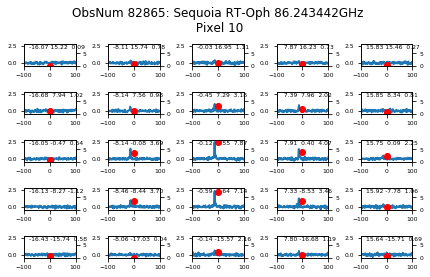

In [6]:
SV = spec_bank_viewer()
SV.open_figure()
plot_limits = [-100,100,-100,100]
SV.plot_all_spectra(S,pixel_number,plot_limits,blist,nb)


In [7]:
B = BeamMap(S,pix_list=[pixel_number])
B.fit_peaks_in_list(fit_circle=30)
BV = BeamMapView()
BV.print_pixel_fits(B)
print(S.ifproc.az_user,B.peak_fit_params[0,1],S.ifproc.el_user,B.peak_fit_params[0,3])
print('%s %d %6.1f %5.1f %6.1f %6.1f'%(S.ifproc.source,S.obsnum,S.ifproc.azim,S.ifproc.elev,S.ifproc.az_user+B.peak_fit_params[0,1],S.ifproc.el_user+B.peak_fit_params[0,3]))
print(' ')



peak fit chisq = 7.649930     rms = 0.553170
-------------------------------------
Fits to Individual Beams: 82865 El= 62.97
-- ------        ------        ------        ------        ------        ------
PX   Peak         AzOFF        AzHPBW         ElOFF        ElHPBW        Success
      (V)          (")           (")           (")           (")
-- ------        ------        ------        ------        ------        ------
10   8.15 0.57     0.43 0.52    16.21 1.47    -3.44 0.61    16.76 1.56  1
-- ------        ------        ------        ------        ------        ------
(4.972922226625915, 0.42500492968961301, 13.980223869804423, -3.4388319413666468)
RT-Oph 82865  103.1  63.0    5.4   10.5
 


[-80, 80, -1, 10]

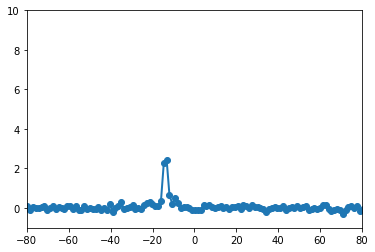

In [8]:
v = S.create_velocity_scale()
pix_index = S.find_pixel_index(pixel_number)
iii = 12
pl.plot(v,(S.map_spectra[pix_index][iii]-np.sum(S.map_spectra[pix_index][iii][S.blist])/S.nb),'o-')
pl.axis([-80,80,-1,10])

[(-0.0, 17.0, 22), (-8.0, 16.0, 21), (8.0, 16.0, 23), (-16.0, 15.0, 20), (16.0, 15.0, 24), (-17.0, 8.0, 19), (-8.0, 8.0, 18), (7.0, 8.0, 16), (16.0, 8.0, 15), (-0.0, 7.0, 17), (-16.0, -0.0, 10), (-8.0, -0.0, 11), (8.0, 0.0, 13), (16.0, 0.0, 14), (-0.0, -1.0, 12), (-16.0, -8.0, 9), (-8.0, -8.0, 8), (-1.0, -8.0, 7), (16.0, -8.0, 5), (7.0, -9.0, 6), (-16.0, -16.0, 0), (-0.0, -16.0, 2), (16.0, -16.0, 4), (-8.0, -17.0, 1), (8.0, -17.0, 3)]


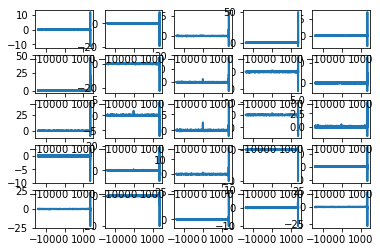

In [9]:
plen = len(S.map_spectra[pix_index])
xlen = ylen = int(math.sqrt(plen))
points = []
for i in range(plen):
    points.append( (np.round(S.map_x[pix_index,i]), np.round(S.map_y[pix_index,i]),i)) 
c = sorted(points,key=lambda point: point[0])
d = sorted(c,key=lambda point: point[1], reverse=True)
print d
for i in range(plen):
    plot_index = d[i][2]
    ax = pl.subplot(xlen,ylen,plot_index+1)
    ax.plot(v,(S.map_spectra[pix_index][plot_index]-np.sum(S.map_spectra[pix_index][plot_index][S.blist])/S.nb))
